<a href="https://colab.research.google.com/github/sandeepbansode/Machine_Learning_Data_Science/blob/main/ML_Advanced_Ensemble_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mporting required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import model_selection
from sklearn import tree
import graphviz
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import StackingClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
#loading the data
df = pd.read_csv('/content/drive/MyDrive/Data Science Files/seeds_dataset (2).csv')

In [ ]:
#checking columns in our data
df.columns

Index(['Area', 'Perimeter', 'Compactness', 'Length of kernel',
       'Width of kernel', 'Asymmetry coefficient', 'Length of kernel groove',
       'Class (1, 2, 3)', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')

In [ ]:
df.head()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,"Class (1, 2, 3)",Unnamed: 8,Unnamed: 9
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,NaN,NaN
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,NaN,NaN
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,NaN,NaN
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,NaN,NaN
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,NaN,NaN


In [ ]:
df.tail()

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,"Class (1, 2, 3)",Unnamed: 8,Unnamed: 9
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3,NaN,NaN
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3,NaN,NaN
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3,NaN,NaN
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3,NaN,NaN
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,3,NaN,NaN


In [ ]:
#taking info of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     210 non-null    float64
 1   Perimeter                210 non-null    float64
 2   Compactness              210 non-null    float64
 3   Length of kernel         210 non-null    float64
 4   Width of kernel          210 non-null    float64
 5   Asymmetry coefficient    210 non-null    float64
 6   Length of kernel groove  210 non-null    float64
 7   Class (1, 2, 3)          210 non-null    int64  
 8   Unnamed: 8               2 non-null      object 
 9   Unnamed: 9               1 non-null      object 
dtypes: float64(7), int64(1), object(2)
memory usage: 16.5+ KB


In [ ]:
#droping the unwaned columns
df.drop(['Unnamed: 8','Unnamed: 9'],axis=1,inplace=True)

In [ ]:
df

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,"Class (1, 2, 3)"
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [ ]:
df.columns

Index(['Area', 'Perimeter', 'Compactness', 'Length of kernel',
       'Width of kernel', 'Asymmetry coefficient', 'Length of kernel groove',
       'Class (1, 2, 3)'],
      dtype='object')

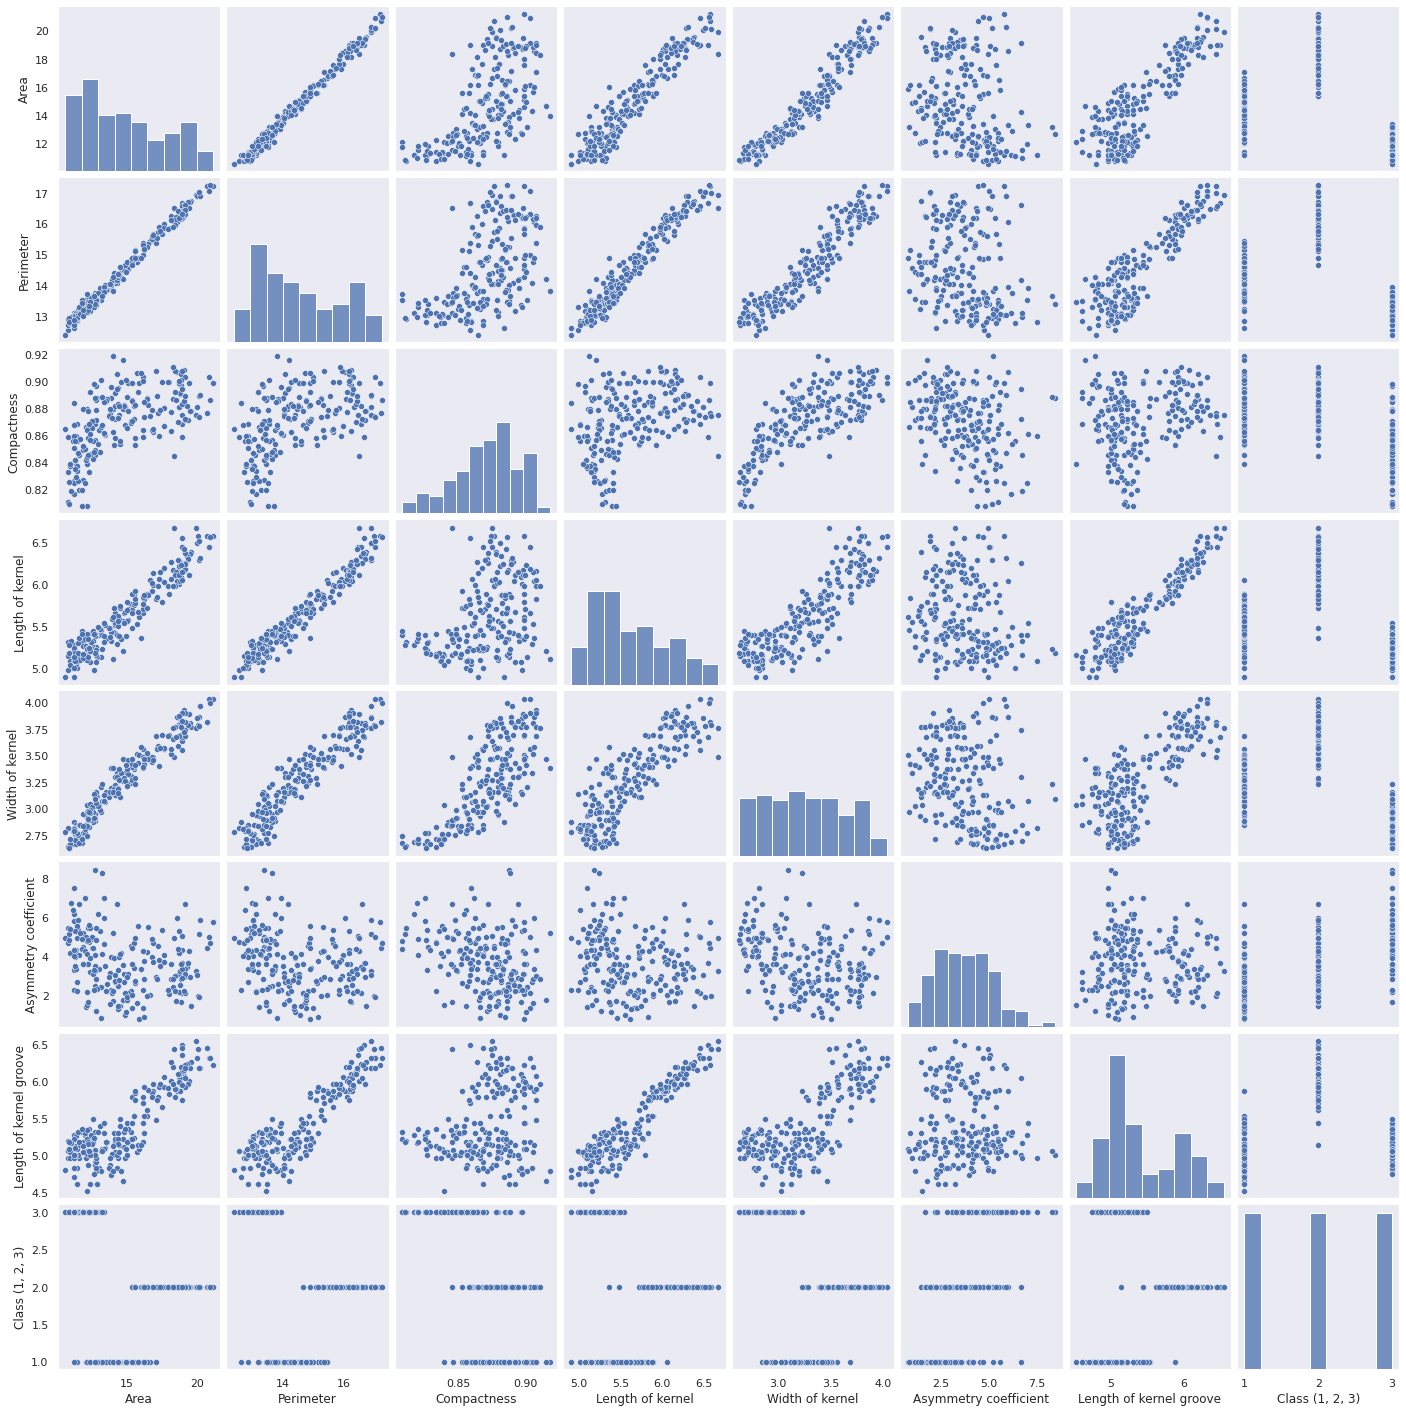

In [ ]:
sns.pairplot(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

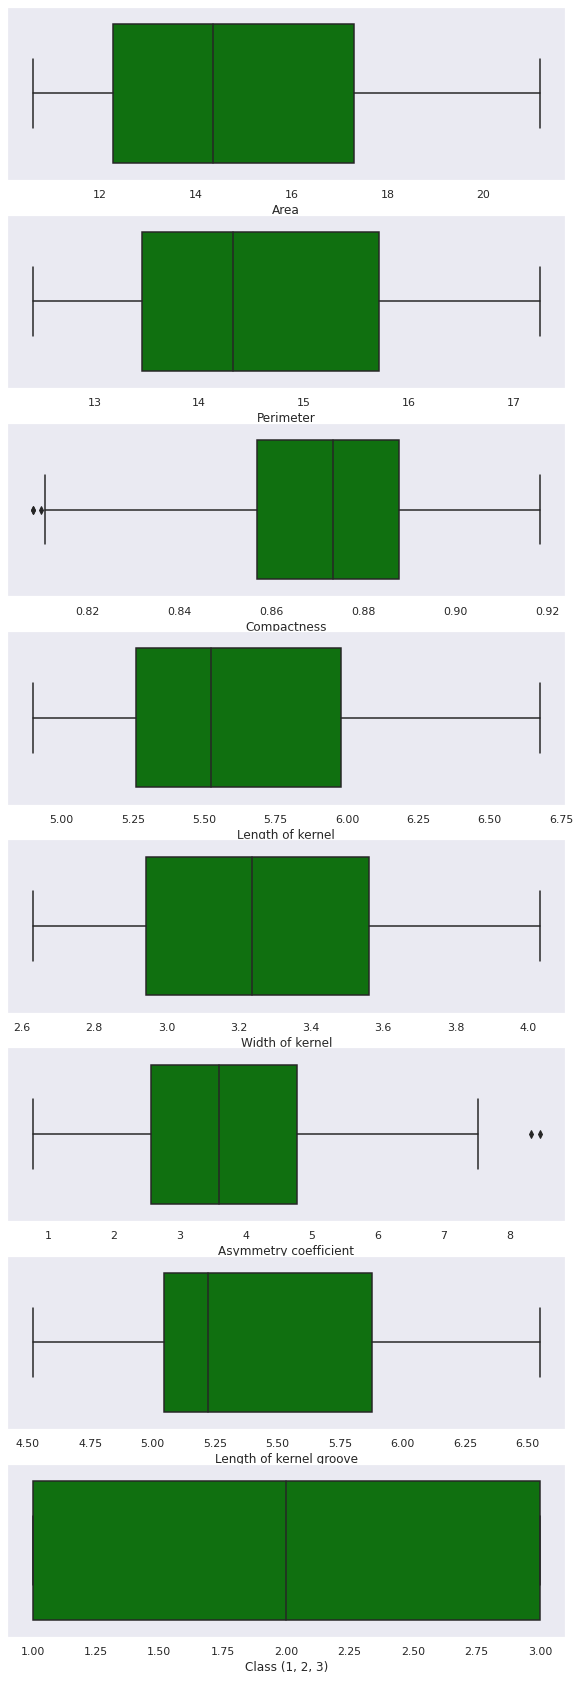

In [ ]:
## boxplot to find the outliers

plt.figure(figsize=(10,30),facecolor='white')
plotnumber=1
for i in df:
    ax=plt.subplot(8,1,plotnumber)
    sns.boxplot(df[i],color='green')
    plotnumber=plotnumber + 1 
plt.show()

we have outliers in compactness and in asymmetry coefficient

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

"plt.figure(figsize=(25,140))\nplotnumber=1\nfor a in df:\n    ax=plt.subplot(20,2,plotnumber)\n    sns.distplot(x=df[a],color='purple')\n    #plt.xticks(rotation=70)\n    plotnumber+=1\nplt.show() "

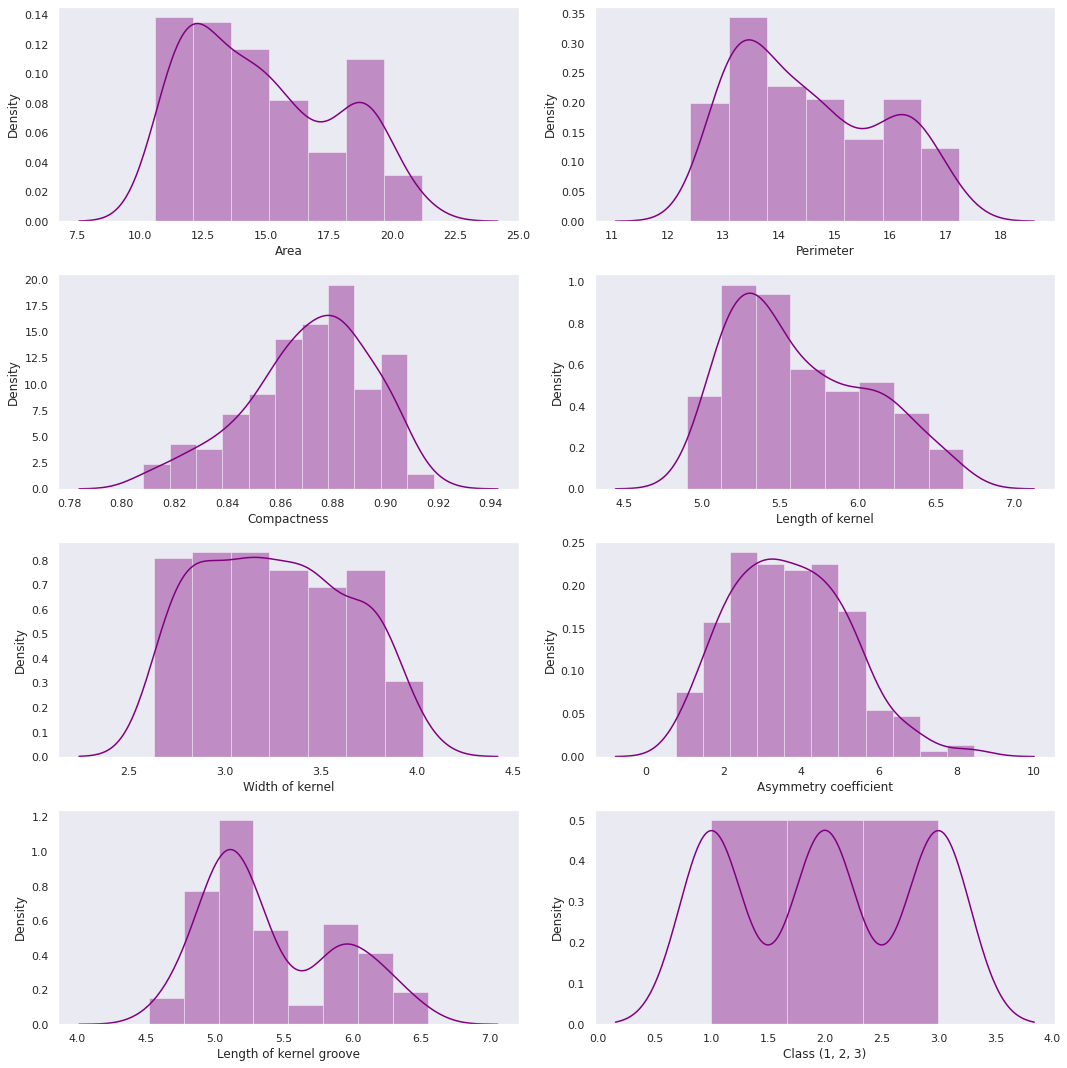

In [ ]:
plt.figure(figsize=(15,15),facecolor='white')

plotnum=1 #counter

for i in df:
    if(plotnum<9):
        a=plt.subplot(4,2,plotnum)#plotting 8 graph
        sns.distplot(df[i],color='purple')#to know distribution
    plotnum+=1#increment counter
plt.tight_layout() 

## Distribution plot 

"""plt.figure(figsize=(25,140))
plotnumber=1
for a in df:
    ax=plt.subplot(20,2,plotnumber)
    sns.distplot(x=df[a],color='purple')
    #plt.xticks(rotation=70)
    plotnumber+=1
plt.show() """

we have to make distribution normalise

# scaling

In [ ]:
# Build Machine Learning Model
#Lets create feature matrix X  and y labels
X = df.drop(('Class (1, 2, 3)'),axis=1)
y = df['Class (1, 2, 3)']

print('X shape=', X.shape)
print('y shape=', y.shape)

X shape= (210, 7)
y shape= (210,)


In [ ]:

# copy the data
df_min_max_scaled = X.copy()
  
# apply normalization techniques
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    
  
# view normalized data
print(df_min_max_scaled)


df2 = df_min_max_scaled

         Area  Perimeter  Compactness  Length of kernel  Width of kernel  \
0    0.440982   0.502066     0.570780          0.486486         0.486101   
1    0.405099   0.446281     0.662432          0.368806         0.501069   
2    0.349386   0.347107     0.879310          0.220721         0.503920   
3    0.306893   0.316116     0.793103          0.239302         0.533856   
4    0.524079   0.533058     0.864791          0.427365         0.664291   
..        ...        ...          ...               ...              ...   
205  0.151086   0.163223     0.637024          0.134009         0.250178   
206  0.060434   0.097107     0.390200          0.135698         0.117605   
207  0.246459   0.258264     0.727768          0.189752         0.429081   
208  0.118036   0.165289     0.399274          0.155405         0.146828   
209  0.161473   0.192149     0.547187          0.193694         0.245189   

     Asymmetry coefficient  Length of kernel groove  
0                 0.189302       

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

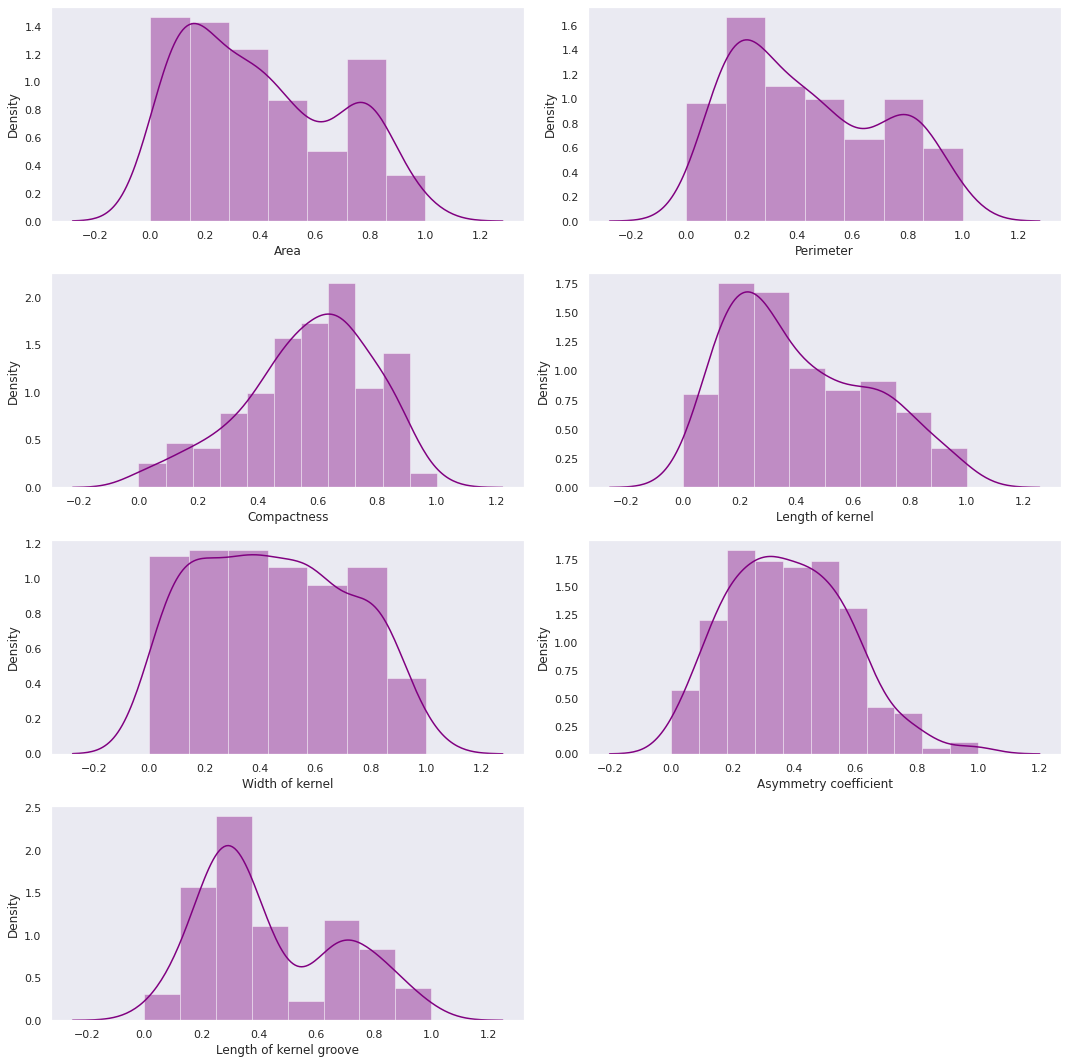

In [ ]:
plt.figure(figsize=(15,15),facecolor='white')

plotnum=1 #counter

for i in df_min_max_scaled:
    if(plotnum<9):
        a=plt.subplot(4,2,plotnum)#plotting 8 graph
        sns.distplot(df_min_max_scaled[i],color='purple')#to know distribution
    plotnum+=1#increment counter
plt.tight_layout() 

In [ ]:
# copy the data
df_z_scaled = df.copy()
  
# apply normalization techniques
for column in df_z_scaled.columns:
    df_z_scaled[column] = (df_z_scaled[column] -
                           df_z_scaled[column].mean()) / df_z_scaled[column].std()    
  
# view normalized data   
display(df_z_scaled)

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,"Class (1, 2, 3)"
0,0.141759,0.214949,0.000060,0.303493,0.141364,-0.983801,-0.382663,-1.221825
1,0.011161,0.008204,0.427494,-0.168223,0.196962,-1.783904,-0.919816,-1.221825
2,-0.191609,-0.359342,1.438945,-0.761817,0.207552,-0.665888,-1.186357,-1.221825
3,-0.346264,-0.474200,1.036904,-0.687336,0.318747,-0.958528,-1.227051,-1.221825
4,0.444196,0.329807,1.371233,0.066507,0.803240,-1.559768,-0.474223,-1.221825
...,...,...,...,...,...,...,...,...
205,-0.913333,-1.040834,0.308997,-1.109397,-0.734959,-0.046025,-1.094797,1.221825
206,-1.243264,-1.285864,-0.842110,-1.102626,-1.227395,0.415547,-0.824186,1.221825
207,-0.566218,-0.688602,0.732199,-0.885953,-0.070436,3.069254,-0.716349,1.221825
208,-1.033620,-1.033176,-0.799790,-1.023631,-1.118847,-0.067973,-0.740765,1.221825


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

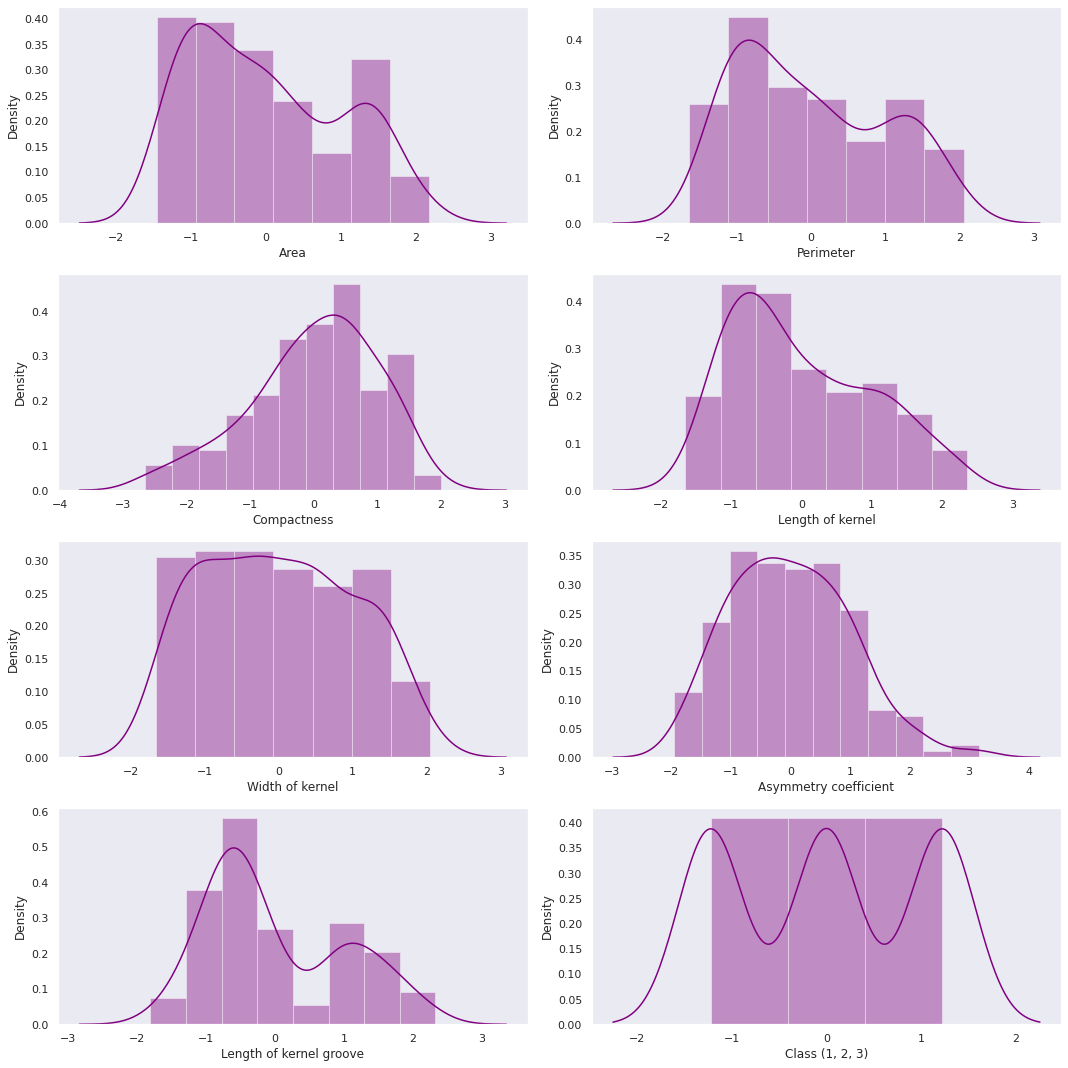

In [ ]:
plt.figure(figsize=(15,15),facecolor='white')

plotnum=1 #counter

for i in df_z_scaled:
    if(plotnum<9):
        a=plt.subplot(4,2,plotnum)#plotting 8 graph
        sns.distplot(df_z_scaled[i],color='purple')#to know distribution
    plotnum+=1#increment counter
plt.tight_layout() 

In [ ]:

# copy the data
df_max_scaled = df.copy()
  
# apply normalization techniques
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
      
# view normalized data
display(df_max_scaled)

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,"Class (1, 2, 3)"
0,0.720491,0.860290,0.948492,0.863371,0.821225,0.262654,0.796947,0.333333
1,0.702550,0.844638,0.959490,0.832060,0.826432,0.120388,0.756641,0.333333
2,0.674693,0.816812,0.985517,0.792659,0.827424,0.319182,0.736641,0.333333
3,0.653447,0.808116,0.975172,0.797603,0.837838,0.267148,0.733588,0.333333
4,0.762040,0.868986,0.983774,0.847640,0.883213,0.160241,0.790076,0.333333
...,...,...,...,...,...,...,...,...
205,0.575543,0.765217,0.956441,0.769588,0.739152,0.429399,0.743511,1.000000
206,0.530217,0.746667,0.926821,0.770037,0.693032,0.511471,0.763817,1.000000
207,0.623229,0.791884,0.967331,0.784419,0.801389,0.983325,0.771908,1.000000
208,0.559018,0.765797,0.927910,0.775281,0.703199,0.425497,0.770076,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

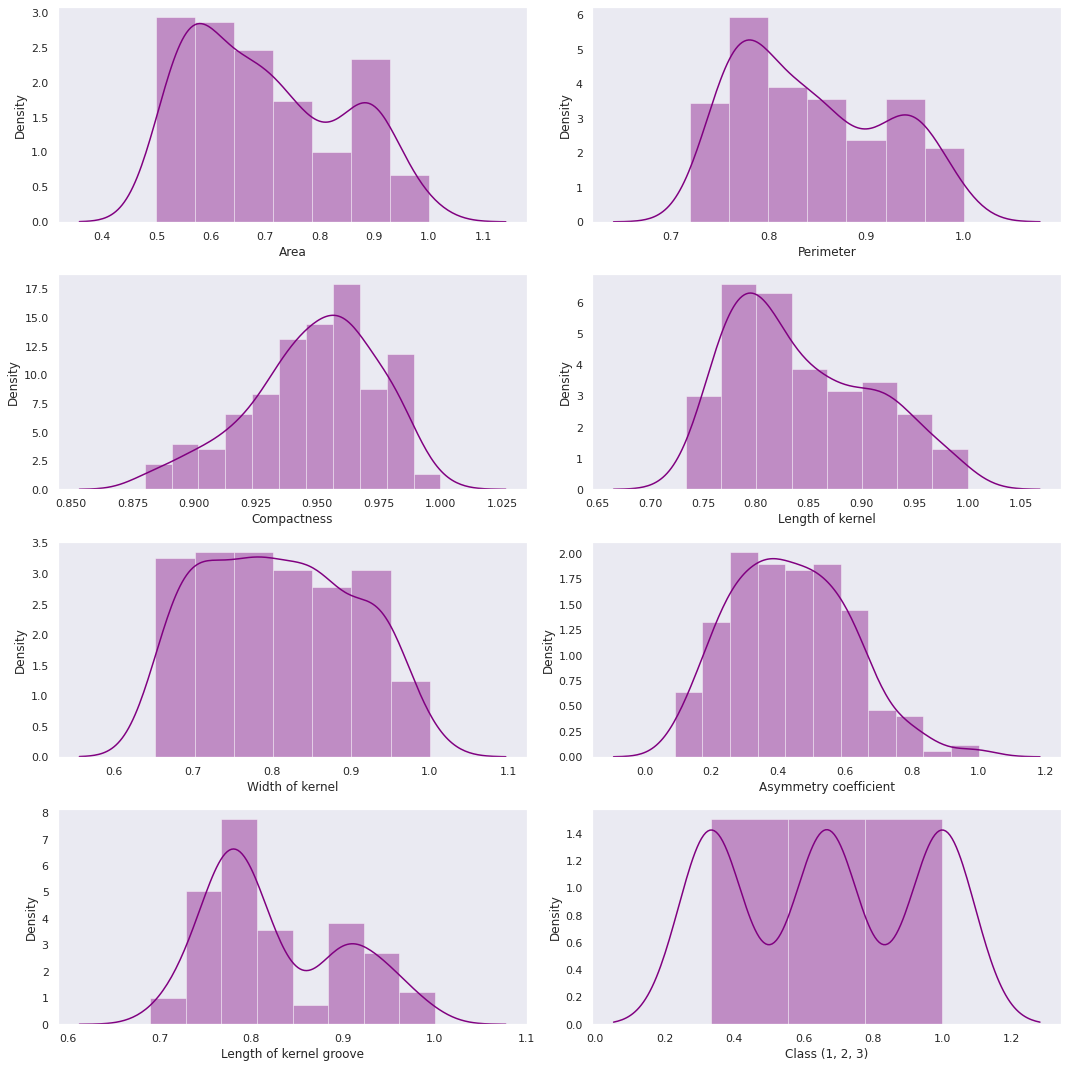

In [ ]:
plt.figure(figsize=(15,15),facecolor='white')

plotnum=1 #counter

for i in df_max_scaled:
    if(plotnum<9):
        a=plt.subplot(4,2,plotnum)#plotting 8 graph
        sns.distplot(df_max_scaled[i],color='purple')#to know distribution
    plotnum+=1#increment counter
plt.tight_layout()

In [ ]:
from scipy.stats import skew

numerical_features = df.dtypes[df.dtypes != 'object'].index

# checking the skewness in all the numerical features
skewed_features = df[numerical_features].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)

# converting the features into a dataframe
skewness = pd.DataFrame({'skew':skewed_features})

# checking the head of skewness dataset
skewness

,skew
Length of kernel groove,0.557876
Length of kernel,0.521721
Asymmetry coefficient,0.398793
Area,0.397027
Perimeter,0.383806
Width of kernel,0.133416
"Class (1, 2, 3)",0.000000
Compactness,-0.534104


# **Builinding model**

In [ ]:
# Build Machine Learning Model
#Lets create feature matrix X  and y labels
X = df2
y = df['Class (1, 2, 3)']

print('X shape=', X.shape)
print('y shape=', y.shape)

X shape= (210, 7)
y shape= (210,)


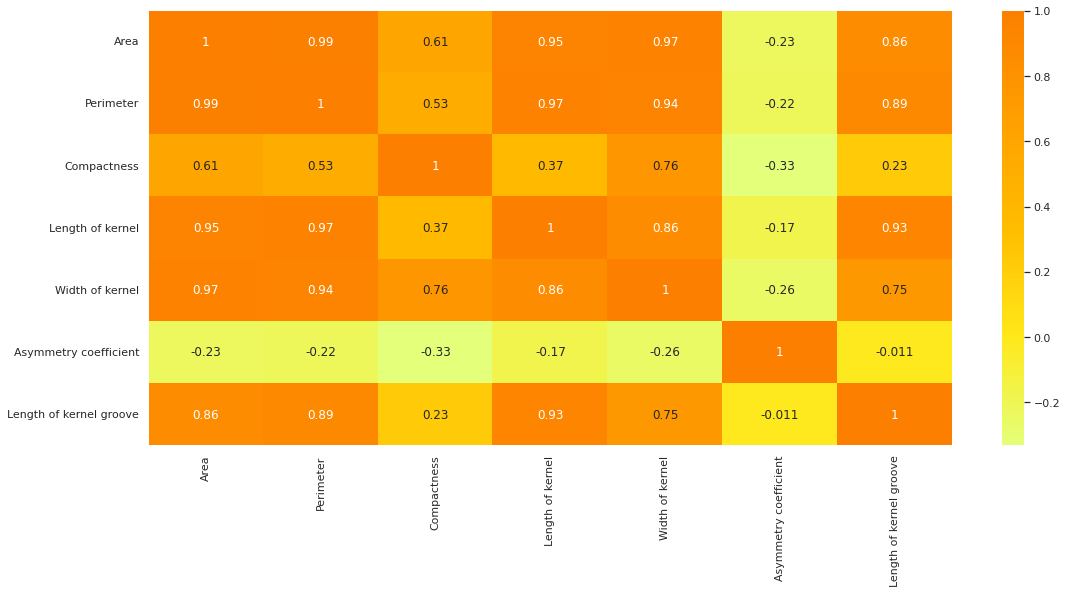

In [ ]:
#correlation plot
#Thier no correlation among variables.
plt.figure(figsize=(18,8))
corr = X.corr()
sns.heatmap(corr , cmap = 'Wistia' , annot = True);

# Checking vif

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#X = df[list(df.columns[:-1])]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
0,810.877193,Area
1,804.654929,Perimeter
4,393.703028,Width of kernel
3,183.102864,Length of kernel
6,46.077798,Length of kernel groove
2,35.073601,Compactness
5,5.821741,Asymmetry coefficient


very high vif value for Area we will drop the Area variable and again check for vif value

In [ ]:
X1 = X.drop(('Area'),axis=1)
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif_info['Column'] = X1.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
0,464.760079,Perimeter
2,179.648474,Length of kernel
3,177.504469,Width of kernel
5,44.166370,Length of kernel groove
1,21.374009,Compactness
4,4.811310,Asymmetry coefficient


In [ ]:
X2 = X1.drop(('Perimeter'),axis=1)
vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif_info['Column'] = X2.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
1,64.254970,Length of kernel
2,50.683796,Width of kernel
4,42.363223,Length of kernel groove
0,18.729983,Compactness
3,4.794261,Asymmetry coefficient


## **split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X2, y, test_size= 0.2, random_state= 1)
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (168, 5)
X_test dimension=  (42, 5)
y_train dimension=  (168,)
y_train dimension=  (42,)


# fitting model

In [ ]:
"""
To obtain a deterministic behaviour during fitting always set value for 'random_state' attribute
Also note that default value of criteria to split the data is 'gini'
"""
cls = tree.DecisionTreeClassifier(random_state= 1)
cls.fit(X_train ,y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:

#Model Score

#Check the model score using test data

cls.score(X_test, y_test)

0.8333333333333334

[Text(0.6818181818181818, 0.9375, 'X[4] <= 0.52\ngini = 0.664\nsamples = 168\nvalue = [50, 61, 57]'),
 Text(0.45454545454545453, 0.8125, 'X[2] <= 0.336\ngini = 0.515\nsamples = 108\nvalue = [49, 2, 57]'),
 Text(0.2727272727272727, 0.6875, 'X[0] <= 0.525\ngini = 0.252\nsamples = 61\nvalue = [9, 0, 52]'),
 Text(0.18181818181818182, 0.5625, 'X[3] <= 0.364\ngini = 0.08\nsamples = 48\nvalue = [2, 0, 46]'),
 Text(0.13636363636363635, 0.4375, 'X[4] <= 0.275\ngini = 0.346\nsamples = 9\nvalue = [2, 0, 7]'),
 Text(0.09090909090909091, 0.3125, 'X[1] <= 0.183\ngini = 0.444\nsamples = 3\nvalue = [2, 0, 1]'),
 Text(0.045454545454545456, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.13636363636363635, 0.1875, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.18181818181818182, 0.3125, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 6]'),
 Text(0.22727272727272727, 0.4375, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]'),
 Text(0.36363636363636365, 0.5625, 'X[3] <= 0.495\ngini = 0.497\ns

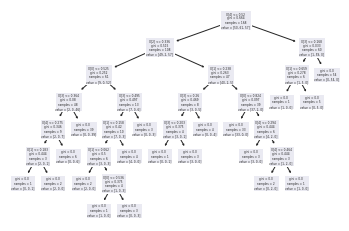

In [ ]:
tree.plot_tree(cls)

In [ ]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred_train = regressor.predict(X_train)

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_pred_train)
print(cm)

[[50  0  0]
 [ 0 61  0]
 [ 0  0 57]]


In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix

y_pred_test = regressor.predict(X_test)

cm = confusion_matrix(y_test, y_pred_test)
print(cm)

[[17  1  2]
 [ 0  9  0]
 [ 0  0 13]]


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print ("Accuracy : ",accuracy_score(y_test,y_pred_test)*100)
	
print("Report : ",classification_report(y_test, y_pred_test))

Accuracy :  92.85714285714286
Report :                precision    recall  f1-score   support

           1       1.00      0.85      0.92        20
           2       0.90      1.00      0.95         9
           3       0.87      1.00      0.93        13

    accuracy                           0.93        42
   macro avg       0.92      0.95      0.93        42
weighted avg       0.94      0.93      0.93        42



#Stacking

training KNeighbors Classifier

In [ ]:
KNC = KNeighborsClassifier()   # initialising KNeighbors Classifier
NB = GaussianNB()              # initialising Naive Bayes

In [ ]:
model_kNeighborsClassifier = KNC.fit(X_train, y_train)   # fitting Training Set
pred_knc = model_kNeighborsClassifier.predict(X_test)   # Predicting on test dataset

In [ ]:
acc_knc = accuracy_score(y_test, pred_knc)  # evaluating accuracy score
print('accuracy score of KNeighbors Classifier is:', acc_knc * 100)

accuracy score of KNeighbors Classifier is: 100.0


Training Naive Bayes Classifier

In [ ]:
model_NaiveBayes = NB.fit(X_train, y_train)
pred_nb = model_NaiveBayes.predict(X_test)

In [ ]:
acc_nb = accuracy_score(y_test, pred_nb)
print('Accuracy of Naive Bayes Classifier:', acc_nb * 100)

Accuracy of Naive Bayes Classifier: 97.61904761904762


In [ ]:

lr = LogisticRegression()  # defining meta-classifier
clf_stack = StackingClassifier(estimators =[KNC, NB], final_estimator = lr)

In [ ]:
print(clf_stack)

StackingClassifier(estimators=[KNeighborsClassifier(), GaussianNB()],
                   final_estimator=LogisticRegression())


In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from vecstack import stacking

In [ ]:
pip install vecstack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19877 sha256=ef13601c1cb2a4636e097ebd2f5f79509930c89da2a92135d450b338e1ea21b8
  Stored in directory: /root/.cache/pip/wheels/28/fe/0c/fe8e43660e3316d7ce204e59a79a72246c0ae9b6c5c79841c8
Successfully built vecstack


In [ ]:
models = [
    KNeighborsClassifier(n_neighbors=5,
                        n_jobs=-1),
        
    RandomForestClassifier(random_state=0, n_jobs=-1, 
                           n_estimators=100, max_depth=3),
        
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                  n_estimators=100, max_depth=3)
]

In [ ]:
S_train, S_test = stacking(models,X_train, y_train, X_test,regression=False,mode='oof_pred_bag',needs_proba=False,save_dir=None,metric=accuracy_score,
                           n_folds=4,stratified=True,shuffle=True,random_state=0,verbose=2)

task:         [classification]
n_classes:    [3]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.92857143]
    fold  1:  [0.92857143]
    fold  2:  [0.88095238]
    fold  3:  [0.88095238]
    ----
    MEAN:     [0.90476190] + [0.02380952]
    FULL:     [0.90476190]

model  1:     [RandomForestClassifier]
    fold  0:  [0.92857143]
    fold  1:  [0.95238095]
    fold  2:  [0.92857143]
    fold  3:  [0.85714286]
    ----
    MEAN:     [0.91666667] + [0.03571429]
    FULL:     [0.91666667]

model  2:     [XGBClassifier]
    fold  0:  [0.90476190]
    fold  1:  [0.88095238]
    fold  2:  [0.90476190]
    fold  3:  [0.90476190]
    ----
    MEAN:     [0.89880952] + [0.01030983]
    FULL:     [0.89880952]



In [ ]:
model = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=100, max_depth=3)
    
model = model.fit(S_train, y_train)
y_pred = model.predict(S_test)
print('Final prediction score: [%.8f]' % accuracy_score(y_test, y_pred))

Final prediction score: [0.95238095]


# **BlendingClassifier**

In [ ]:
def BlendingClassifier(self):

    # Define weak learners
    weak_learners = [('dt', DecisionTreeClassifier()),
                    ('knn', KNeighborsClassifier()),
                    ('rf', RandomForestClassifier()),
                    ('gb', GradientBoostingClassifier()),
                    ('gn', GaussianNB())]
    
    # Finaler learner or meta model
    final_learner = LogisticRegression()

    train_meta_model = X
    test_meta_model = y

    # Start stacking
    for clf_id, clf in weak_learners:
        
        # Predictions for each classifier based on k-fold
        val_predictions, test_predictions = self.train_level_0(clf)
        
        # Stack predictions which will form 
        # the inputa data for the data model
        if isinstance(train_meta_model, np.ndarray):
            train_meta_model = np.vstack((train_meta_model, val_predictions))
        else:
            train_meta_model = val_predictions

        # Stack predictions from test set
        # which will form test data for meta model
        if isinstance(test_meta_model, np.ndarray):
            test_meta_model = np.vstack((test_meta_model, test_predictions))
        else:
            test_meta_model = test_predictions
    
    # Transpose train_meta_model
    train_meta_model = train_meta_model.T

    # Transpose test_meta_model
    test_meta_model = test_meta_model.T
    
    # Training level 1
    self.train_level_1(final_learner, train_meta_model, test_meta_model)

In [ ]:
model_1 = tree.DecisionTreeClassifier()
model_1.fit(X_train, y_train)
#holdout_pred_1=model_1.predict(X_test)
test_pred_1=model_1.predict(X_test)
#holdout_pred_1=pd.DataFrame(holdout_pred_1)
test_pred_1=pd.DataFrame(test_pred_1)

model_2 = KNeighborsClassifier()
model_2.fit(X_train,y_train)
#holdout_pred_2=model_2.predict(x_val)
test_pred_2=model_2.predict(X_test)
#holdout_pred_2=pd.DataFrame(holdout_pred_2)
test_pred_2=pd.DataFrame(test_pred_2)
X_test=pd.DataFrame(X_test)

In [ ]:
df_test=pd.concat([test_pred_1,test_pred_2],axis=1)

model = LogisticRegression()
model.fit(df_test,y_test)
model.score(df_test,y_test)

1.0

In [ ]:
x_train = X_train
x_test = X_test

In [ ]:
def Stacking(model,train,y,test,n_fold):
  folds=StratifiedKFold(n_splits=n_fold)
  test_pred=np.empty((test.shape[0],1),float)
  train_pred=np.empty((0,1),float)
  
  for train_indices,val_indices in folds.split(train,y.values):
    x_train,x_val=train.iloc[train_indices],train.iloc[val_indices]
    y_train,y_val=y.iloc[train_indices],y.iloc[val_indices]
    model.fit(X=x_train,y=y_train)
    train_pred=np.append(train_pred,model.predict(x_val))
    test_pred=np.append(test_pred,model.predict(test))
    
  return test_pred.reshape(-1,1),train_pred

In [ ]:
from sklearn.model_selection import StratifiedKFold
# initialise the base models
model_1 = tree.DecisionTreeClassifier(random_state=1)
model_2 = KNeighborsClassifier()

# train base models and create new featurs
test_pred_1,train_pred_1 =Stacking(model=model_1,n_fold =10, train=x_train,test=x_test,y=y_train)
test_pred_2 ,train_pred_2=Stacking(model=model_2,n_fold=10,train=x_train,test=x_test,y=y_train)

# convert into dataframe for later use
train_pred_1=pd.DataFrame(train_pred_1)
test_pred_1=pd.DataFrame(test_pred_1)
train_pred_2=pd.DataFrame(train_pred_2)
test_pred_2=pd.DataFrame(test_pred_2)

In [ ]:
df = pd.concat([train_pred_1, train_pred_2], axis=1)
df_test = pd.concat([test_pred_1, test_pred_2], axis=1)

model = LogisticRegression(random_state=1)
model.fit(df,y_train)
model.score(df_test, y_test)

In [ ]:
y_test.shape

(42,)

In [ ]:
df_test.shape

(462, 2)

In [ ]:
test_pred_1.shape

(462, 1)

In [ ]:
X.shape

(210, 7)

In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


class Ensemble:
    def __init__(self):
        self.x_train = None
        self.x_test = None
        self.y_train = None
        self.y_test = None

    def load_data(self):
        x, y = X,y
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x, y, test_size=0.15, random_state=23)
        self.x_train, self.x_val, self.y_train, self.y_val = train_test_split(self.x_train, self.y_train, test_size=0.3,
                                                                              random_state=23)

    def BlendingClassifier(self):

        # Define weak learners
        weak_learners = [('dt', DecisionTreeClassifier()),
                         ('knn', KNeighborsClassifier()),
                         ('rf', RandomForestClassifier()),
                         ('gb', GradientBoostingClassifier()),
                         ('gn', GaussianNB())]

        # Final learner or meta model
        final_learner = LogisticRegression()

        train_meta_model = None
        test_meta_model = None

        # Start stacking
        for clf_id, clf in weak_learners:

            # Predictions for each classifier based on k-fold
            val_predictions, test_predictions = self.train_level_0(clf)

            # Stack predictions which will form 
            # the input data for the data model
            if isinstance(train_meta_model, np.ndarray):
                train_meta_model = np.vstack((train_meta_model, val_predictions))
            else:
                train_meta_model = val_predictions

            # Stack predictions from test set
            # which will form test data for meta model
            if isinstance(test_meta_model, np.ndarray):
                test_meta_model = np.vstack((test_meta_model, test_predictions))
            else:
                test_meta_model = test_predictions

        # Transpose train_meta_model
        train_meta_model = train_meta_model.T

        # Transpose test_meta_model
        test_meta_model = test_meta_model.T

        # Training level 1
        self.train_level_1(final_learner, train_meta_model, test_meta_model)

    def train_level_0(self, clf):
        # Train with base x_train
        clf.fit(self.x_train, self.y_train)

        # Generate predictions for the holdout set (validation)
        # These predictions will build the input for the meta model
        val_predictions = clf.predict(self.x_val)

        # Generate predictions for original test set
        # These predictions will be used to test the meta model
        test_predictions = clf.predict(self.x_test)

        return val_predictions, test_predictions

    def train_level_1(self, final_learner, train_meta_model, test_meta_model):
        # Train is carried out with final learner or meta model
        final_learner.fit(train_meta_model, self.y_val)

        # Getting train and test accuracies from meta_model
        print(f"Train accuracy: {final_learner.score(train_meta_model, self.y_val)}")
        print(f"Test accuracy: {final_learner.score(test_meta_model, self.y_test)}")


if __name__ == "__main__":
    ensemble = Ensemble()
    ensemble.load_data()
    ensemble.BlendingClassifier()

# **Bagging**

In [ ]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# load the data

X = X
Y =y

seed = 8
kfold = model_selection.KFold(n_splits = 3)

# initialize the base classifier
base_cls = DecisionTreeClassifier()

# no. of base classifier
num_trees = 500

# bagging classifier
model = BaggingClassifier(base_estimator = base_cls,
						n_estimators = num_trees,
						random_state = seed)

results = model_selection.cross_val_score(model, X, Y, cv = kfold)
print("accuracy :")
print(results)


accuracy :
[0. 0. 0.]


In [ ]:
X

,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove
0,0.440982,0.502066,0.570780,0.486486,0.486101,0.189302,0.345150
1,0.405099,0.446281,0.662432,0.368806,0.501069,0.032883,0.215165
2,0.349386,0.347107,0.879310,0.220721,0.503920,0.251453,0.150665
3,0.306893,0.316116,0.793103,0.239302,0.533856,0.194243,0.140817
4,0.524079,0.533058,0.864791,0.427365,0.664291,0.076701,0.322994
...,...,...,...,...,...,...,...
205,0.151086,0.163223,0.637024,0.134009,0.250178,0.372635,0.172821
206,0.060434,0.097107,0.390200,0.135698,0.117605,0.462872,0.238306
207,0.246459,0.258264,0.727768,0.189752,0.429081,0.981667,0.264402
208,0.118036,0.165289,0.399274,0.155405,0.146828,0.368344,0.258493


# **Boosting**

Xgboosting

In [ ]:

# Importing the libraries
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 

X = X
y = y
 
# Fitting XGBoost to the training data
my_model = xgb.XGBClassifier()
my_model.fit(X_train, y_train)
 
# Predicting the Test set results
y_pred = my_model.predict(X_test)

 
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
accuracy_score(y_test, y_pred)

0.9761904761904762

In [ ]:
print(cm)

[[19  0  1]
 [ 0  9  0]
 [ 0  0 13]]
